# Predict customer churn

## 1 Business understanding
Predicting when a customer may move to a competitor by analysis Data and compute a churn risk factor. This is a common telecom business risk but it applies to any industry which focus on customer satisfaction and loyalty.  The training and test data are in ../data_assets folder.

## The approach
This notebook is using python sklearn to model a decision tree and random forest.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 2 Understanding the data
### 1 - Load customer and churn data
The provided data has civil information about the subscriberm, financial data and consumption usage. The rate plan represents the product and rate assigned to the account owner.

In [2]:
customers=pd.read_csv('./data_assets/customer.csv',index_col='ID')
customers.head()

,Gender,Status,Children,Est Income,Car Owner,Age,LongDistance,International,Local,Dropped,Paymethod,LocalBilltype,LongDistanceBilltype,Usage,RatePlan
ID,,,,,,,,,,,,,,,
1,F,S,1.0,38000.00,N,24.393333,23.56,0.0,206.08,0.0,CC,Budget,Intnl_discount,229.64,3.0
6,M,M,2.0,29616.00,N,49.426667,29.78,0.0,45.50,0.0,CH,FreeLocal,Standard,75.29,2.0
8,M,M,0.0,19732.80,N,50.673333,24.81,0.0,22.44,0.0,CC,FreeLocal,Standard,47.25,3.0
11,M,S,2.0,96.33,N,56.473333,26.13,0.0,32.88,1.0,CC,Budget,Standard,59.01,1.0
14,F,M,2.0,52004.80,N,25.140000,5.03,0.0,23.11,0.0,CH,Budget,Intnl_discount,28.14,1.0


In [3]:
churns=pd.read_csv('./data_assets/churn.csv')
churns.head()

,ID,CHURN
0,1,T
1,6,F
2,8,F
3,11,F
4,14,F


### 2- Prepare data
Join the the two data frames as they use the same index attribute: ID, so we can search for when a churn is true.

In [4]:
custchurns=customers.join(churns.set_index('ID'))

In [5]:
custchurns.head()

,Gender,Status,Children,Est Income,Car Owner,Age,LongDistance,International,Local,Dropped,Paymethod,LocalBilltype,LongDistanceBilltype,Usage,RatePlan,CHURN
ID,,,,,,,,,,,,,,,,
1,F,S,1.0,38000.00,N,24.393333,23.56,0.0,206.08,0.0,CC,Budget,Intnl_discount,229.64,3.0,T
6,M,M,2.0,29616.00,N,49.426667,29.78,0.0,45.50,0.0,CH,FreeLocal,Standard,75.29,2.0,F
8,M,M,0.0,19732.80,N,50.673333,24.81,0.0,22.44,0.0,CC,FreeLocal,Standard,47.25,3.0,F
11,M,S,2.0,96.33,N,56.473333,26.13,0.0,32.88,1.0,CC,Budget,Standard,59.01,1.0,F
14,F,M,2.0,52004.80,N,25.140000,5.03,0.0,23.11,0.0,CH,Budget,Intnl_discount,28.14,1.0,F


#### Rename some column 

In [6]:
new_cols = custchurns.columns.values

new_cols[3]="EstIncome"
new_cols[4]="CarOwner"
custchurns.columns=new_cols
custchurns.head()

,Gender,Status,Children,EstIncome,CarOwner,Age,LongDistance,International,Local,Dropped,Paymethod,LocalBilltype,LongDistanceBilltype,Usage,RatePlan,CHURN
ID,,,,,,,,,,,,,,,,
1,F,S,1.0,38000.00,N,24.393333,23.56,0.0,206.08,0.0,CC,Budget,Intnl_discount,229.64,3.0,T
6,M,M,2.0,29616.00,N,49.426667,29.78,0.0,45.50,0.0,CH,FreeLocal,Standard,75.29,2.0,F
8,M,M,0.0,19732.80,N,50.673333,24.81,0.0,22.44,0.0,CC,FreeLocal,Standard,47.25,3.0,F
11,M,S,2.0,96.33,N,56.473333,26.13,0.0,32.88,1.0,CC,Budget,Standard,59.01,1.0,F
14,F,M,2.0,52004.80,N,25.140000,5.03,0.0,23.11,0.0,CH,Budget,Intnl_discount,28.14,1.0,F


### Present some data graphically
A curve age/Usage

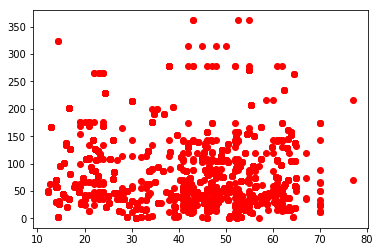

In [9]:
markers = ('s', 'x', 'o', '^', 'v')
colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
X=custchurns['Age']
y=custchurns['Usage']
plt.plot(X,y,'ro')
plt.show()